In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
df = pd.read_csv('trainM.csv')
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,600.000000,600.000000,600.000000
mean,0.648918,0.687188,0.813644,0.430948,0.449251,144.850362,27.429285,0.540765,1.038333,0.688333,6920.379867
std,0.477706,0.464025,1.199394,0.495621,0.497832,81.246122,8.540662,0.498751,0.788183,0.463561,6213.130723
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,30.000000,0.000000,0.000000,0.000000,4158.250000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,30.000000,1.000000,1.000000,1.000000,5407.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,162.000000,30.000000,1.000000,2.000000,1.000000,7451.500000
max,1.000000,1.000000,4.000000,1.000000,1.000000,650.000000,40.000000,1.000000,2.000000,1.000000,81000.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    int64  
 1   Married           601 non-null    int64  
 2   Dependents        601 non-null    int64  
 3   Education         601 non-null    int64  
 4   Self_Employed     601 non-null    int64  
 5   LoanAmount        601 non-null    float64
 6   Loan_Amount_Term  601 non-null    float64
 7   Credit_History    601 non-null    int64  
 8   Property_Area     600 non-null    float64
 9   Loan_Status       600 non-null    float64
 10  Total_Income      600 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 51.8 KB


In [42]:
df.shape

(601, 11)

In [43]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       1
Loan_Status         1
Total_Income        1
dtype: int64

In [44]:
#Converting the scale of loan term from months to years becuase we have a day
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

LoanAmount


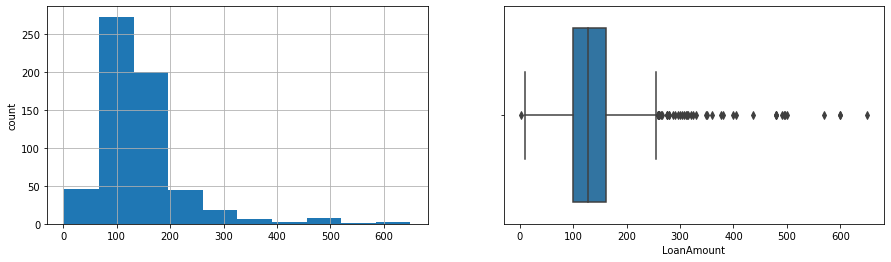

Total_Income


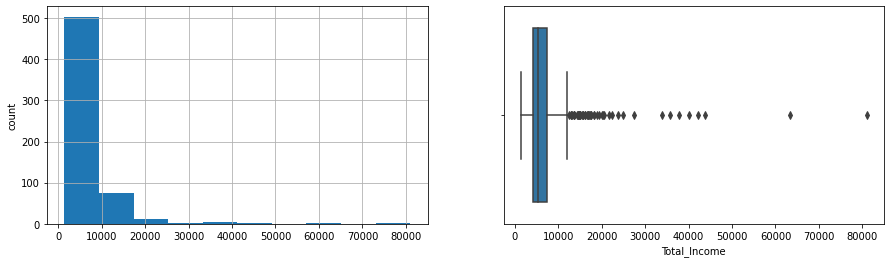

In [45]:
#Checking the distribution and outliers for each column in the data
for col in ['LoanAmount', 'Total_Income']:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=True)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [46]:
#Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban.
#We can observe from the histogram that majority of values for total income are less than 10,000K dollars.
#Now, let's check the percentage of observations in each category for all the categorical variables.

In [47]:
#Creating list of categorical columns
categorical_clmn= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for clmn in categorical_clmn:
    print(df[clmn].value_counts(normalize=True)) 
    print('-'*30)    

1    0.648918
0    0.351082
Name: Gender, dtype: float64
------------------------------
1    0.687188
0    0.312812
Name: Married, dtype: float64
------------------------------
0    0.589018
1    0.168053
2    0.163062
4    0.079867
Name: Dependents, dtype: float64
------------------------------
0    0.569052
1    0.430948
Name: Education, dtype: float64
------------------------------
0    0.550749
1    0.449251
Name: Self_Employed, dtype: float64
------------------------------
1    0.540765
0    0.459235
Name: Credit_History, dtype: float64
------------------------------
1.0    0.378333
2.0    0.330000
0.0    0.291667
Name: Property_Area, dtype: float64
------------------------------
1.0    0.688333
0.0    0.311667
Name: Loan_Status, dtype: float64
------------------------------


In [48]:
#The vast majority of applicants are male (64%).

#68% of applicants are married, and 57% of them have no dependents

#56% of the applicants are graduates

#55% of the applicants are self employed

#54% of the applicants have credit histories that meet the required guidelines

#The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

In [49]:
#Finally, we need to encode our loan status column to make it eligible for modeling, and replace other columns to avoid empty raws

In [50]:
#df['Married'].fillna("Yes",inplace=True)
#df['Dependents'].fillna(0,inplace= True)
#df['Self_Employed'].fillna('No',inplace=True)
#df['Credit_History'].fillna(0,inplace = True)

#df=df.replace(to_replace='3+',value=4)
#df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

#mean_loan=df['LoanAmount'].mean()
#df['LoanAmount'].fillna(mean_loan,inplace = True)

#mean_loan_term=df['Loan_Amount_Term'].mean()
#df['Loan_Amount_Term'].fillna(mean_loan_term,inplace = True)

df=df.dropna()
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

In [51]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
596,0,1,0,1,0,71.0,2.5,0,0.0,1.0,2900.0
597,1,1,4,1,0,40.0,0.0,1,0.0,1.0,4106.0
598,1,1,1,0,1,253.0,2.5,1,2.0,1.0,8312.0
599,1,1,2,0,0,187.0,2.5,0,2.0,1.0,7583.0
600,0,0,0,1,1,133.0,2.5,0,1.0,0.0,4583.0


In [52]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.650000,0.688333,0.815000,0.430000,0.448333,145.088446,2.289444,0.541667,1.038333,0.688333,6920.379867
std,0.477368,0.463561,1.199934,0.495489,0.497738,81.103812,0.706599,0.498677,0.788183,0.463561,6213.130723
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,2.500000,0.000000,0.000000,0.000000,4158.250000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,2.500000,1.000000,1.000000,1.000000,5407.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,162.500000,2.500000,1.000000,2.000000,1.000000,7451.500000
max,1.000000,1.000000,4.000000,1.000000,1.000000,650.000000,3.333333,1.000000,2.000000,1.000000,81000.000000


In [53]:
#Now when DF is ready let look at plots to see how different Nodes have impact on Loan status where 0 is No and 1 is Yes

<AxesSubplot:xlabel='Education', ylabel='count'>

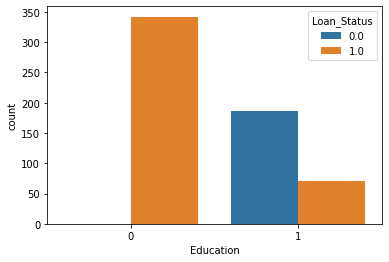

In [54]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [55]:
# plot demonstatre that graduate person has bigger percent of approved loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

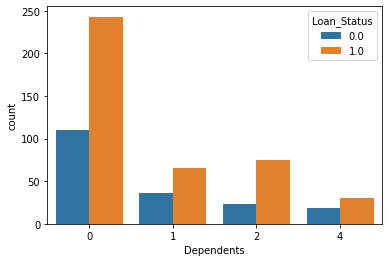

In [56]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

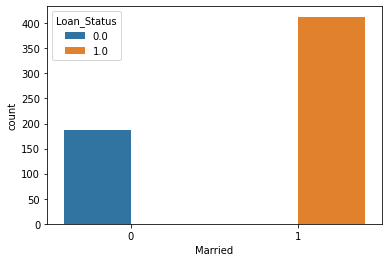

In [57]:
sns.countplot(x='Married', hue='Loan_Status', data = df)

In [58]:
# plot demonstatre that married person has bigger percent of approved loan beacuse there can have a pair income

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

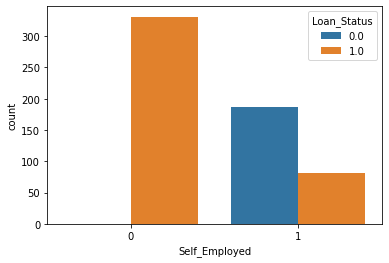

In [59]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data = df)

In [60]:
# plot show that self employed people has Denied more becuase they have risk be a bacnrupt

<AxesSubplot:xlabel='Gender', ylabel='count'>

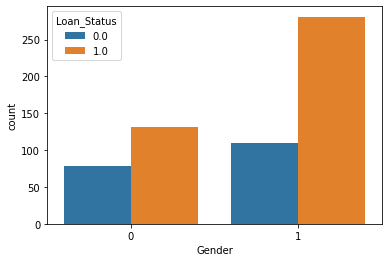

In [61]:
sns.countplot(x='Gender', hue='Loan_Status', data = df)

In [62]:
# male has more aproved

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

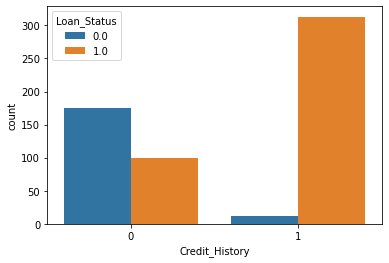

In [63]:
sns.countplot(x='Credit_History', hue='Loan_Status', data = df)

In [64]:
#The plot shows that credit history is an important factor while checking loan eligibility. 
#There are very few customers whose loan was approved even when their credit history did not meet required guideline

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

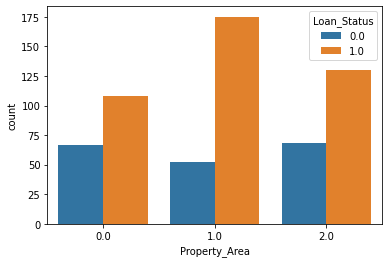

In [65]:
sns.countplot(x='Property_Area', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

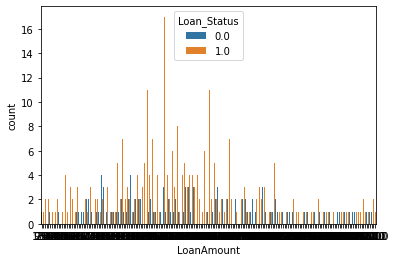

In [66]:
sns.countplot(x='LoanAmount', hue='Loan_Status', data = df)

In [67]:
# it also important plot because area demonstrate the ability to make money

In [68]:
#The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
#There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

In [69]:
#Now that we have processed and explored our data, let's prepare it for Modeling.

In [70]:
#Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
#We will then split the data into train and test sets.

In [71]:
#https://www.kaggle.com/code/patrickparsa/loan-eligibility-with-logistic-regression-and-knn

In [72]:
#Markov network

In [73]:
import pandas as pd
import numpy as np
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor

In [74]:
G=MarkovNetwork()

In [75]:
#'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      #'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'N':0,'Y':1}, 'Credit_History':{'0.0':0, '1.0': 1}

In [76]:
df=pd.DataFrame(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'])

In [77]:
df.tail()

,Gender,Married,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
596,0,1,1,0,0.0,0,1.0
597,1,1,1,0,0.0,1,1.0
598,1,1,0,1,2.0,1,1.0
599,1,1,0,0,2.0,0,1.0
600,0,0,1,1,1.0,0,0.0


In [78]:
Gender = list(map(int, df['Gender'].values.tolist()))
Married = list(map(int, df['Married'].values.tolist()))
Education = list(map(int, df['Education'].values.tolist()))
SelfEmployed = list(map(int, df['Self_Employed'].values.tolist()))
PropertyArea = list(map(int, df['Property_Area'].values.tolist()))
CreditHistory = list(map(int, df['Credit_History'].values.tolist()))
LoanStatus = list(map(int, df['Loan_Status'].values.tolist()))


In [79]:
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)

def occur(list1, list2):  
    a = unique(list1)  
    b = unique(list2)
    print(a)
    print(b)
    values_for_v1_v2 = []  
    for aa  in a: 
        for bb in b:
            values_for_v1_v2.append(((list1==aa)&(list2==bb)).sum())  
    return values_for_v1_v2

In [80]:
value1 = occur(Gender, Married)
print(value1)

[0 1]
[0 1]
[78, 132, 109, 281]


In [81]:
value2 = occur(Married, Education) 
print(value2)

[0 1]
[0 1]
[0, 187, 342, 71]


In [82]:
value3 = occur(Education, SelfEmployed)
print(value3)

[0 1]
[0 1]
[289, 53, 42, 216]


In [83]:
value4 = occur(SelfEmployed, PropertyArea)
print(value4)

[0 1]
[0 1 2]
[88, 135, 108, 87, 92, 90]


In [84]:
value5 = occur(PropertyArea, CreditHistory)
print(value5)

[0 1 2]
[0 1]
[80, 95, 101, 126, 94, 104]


In [85]:
value6 = occur(CreditHistory, LoanStatus)
print(value6)

[0 1]
[0 1]
[175, 100, 12, 313]


In [86]:
G.add_nodes_from(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'])

In [87]:
G.add_edges_from([('Gender','Married'), ('Married','Education'), ('Education','Self_Employed'), ('Self_Employed', 'Property_Area'),('Property_Area', 'Credit_History'), ('Credit_History', 'Loan_Status')])

In [88]:
factor1 = DiscreteFactor(['Gender','Married'], cardinality=[2, 2], values=value1)
factor2 = DiscreteFactor(['Married','Education'], cardinality=[2, 2], values=value2)
factor3 = DiscreteFactor(['Education','Self_Employed'], cardinality=[2, 2], values=value3)
factor4 = DiscreteFactor(['Self_Employed', 'Property_Area'], cardinality=[2, 3], values=value4)
factor5 = DiscreteFactor(['Property_Area', 'Credit_History'], cardinality=[3, 2], values=value5)
factor6 = DiscreteFactor(['Credit_History', 'Loan_Status'], cardinality=[2, 2], values=value6)

In [89]:
G.add_factors(factor1)
G.add_factors(factor2)
G.add_factors(factor3)
G.add_factors(factor4)
G.add_factors(factor5)
G.add_factors(factor6)



In [90]:
G.get_factors()

[<DiscreteFactor representing phi(Gender:2, Married:2) at 0x289756c4eb0>,
 <DiscreteFactor representing phi(Married:2, Education:2) at 0x289756ad1f0>,
 <DiscreteFactor representing phi(Education:2, Self_Employed:2) at 0x289756c4640>,
 <DiscreteFactor representing phi(Self_Employed:2, Property_Area:3) at 0x289756c45b0>,
 <DiscreteFactor representing phi(Property_Area:3, Credit_History:2) at 0x289756c4bb0>,
 <DiscreteFactor representing phi(Credit_History:2, Loan_Status:2) at 0x289756c4e50>]

In [91]:
G.get_local_independencies()

(Gender ⟂ Education, Self_Employed, Loan_Status, Property_Area, Credit_History | Married)
(Married ⟂ Self_Employed, Property_Area, Credit_History, Loan_Status | Education, Gender)
(Education ⟂ Property_Area, Gender, Loan_Status, Credit_History | Self_Employed, Married)
(Self_Employed ⟂ Married, Gender, Loan_Status, Credit_History | Education, Property_Area)
(Property_Area ⟂ Education, Gender, Loan_Status, Married | Self_Employed, Credit_History)
(Credit_History ⟂ Self_Employed, Education, Gender, Married | Property_Area, Loan_Status)
(Loan_Status ⟂ Education, Gender, Self_Employed, Property_Area, Married | Credit_History)

In [92]:
print(factor1)

+-----------+------------+-----------------------+
| Gender    | Married    |   phi(Gender,Married) |
+===========+============+=======================+
| Gender(0) | Married(0) |               78.0000 |
+-----------+------------+-----------------------+
| Gender(0) | Married(1) |              132.0000 |
+-----------+------------+-----------------------+
| Gender(1) | Married(0) |              109.0000 |
+-----------+------------+-----------------------+
| Gender(1) | Married(1) |              281.0000 |
+-----------+------------+-----------------------+


In [93]:
print(factor2)

+------------+--------------+--------------------------+
| Married    | Education    |   phi(Married,Education) |
+============+==============+==========================+
| Married(0) | Education(0) |                   0.0000 |
+------------+--------------+--------------------------+
| Married(0) | Education(1) |                 187.0000 |
+------------+--------------+--------------------------+
| Married(1) | Education(0) |                 342.0000 |
+------------+--------------+--------------------------+
| Married(1) | Education(1) |                  71.0000 |
+------------+--------------+--------------------------+


In [94]:
print(factor3)

+--------------+------------------+--------------------------------+
| Education    | Self_Employed    |   phi(Education,Self_Employed) |
+==============+==================+================================+
| Education(0) | Self_Employed(0) |                       289.0000 |
+--------------+------------------+--------------------------------+
| Education(0) | Self_Employed(1) |                        53.0000 |
+--------------+------------------+--------------------------------+
| Education(1) | Self_Employed(0) |                        42.0000 |
+--------------+------------------+--------------------------------+
| Education(1) | Self_Employed(1) |                       216.0000 |
+--------------+------------------+--------------------------------+


In [95]:
print(factor4)

+------------------+------------------+------------------------------------+
| Self_Employed    | Property_Area    |   phi(Self_Employed,Property_Area) |
+==================+==================+====================================+
| Self_Employed(0) | Property_Area(0) |                            88.0000 |
+------------------+------------------+------------------------------------+
| Self_Employed(0) | Property_Area(1) |                           135.0000 |
+------------------+------------------+------------------------------------+
| Self_Employed(0) | Property_Area(2) |                           108.0000 |
+------------------+------------------+------------------------------------+
| Self_Employed(1) | Property_Area(0) |                            87.0000 |
+------------------+------------------+------------------------------------+
| Self_Employed(1) | Property_Area(1) |                            92.0000 |
+------------------+------------------+------------------------------------+

In [96]:
print(factor5)

+------------------+-------------------+-------------------------------------+
| Property_Area    | Credit_History    |   phi(Property_Area,Credit_History) |
+==================+===================+=====================================+
| Property_Area(0) | Credit_History(0) |                             80.0000 |
+------------------+-------------------+-------------------------------------+
| Property_Area(0) | Credit_History(1) |                             95.0000 |
+------------------+-------------------+-------------------------------------+
| Property_Area(1) | Credit_History(0) |                            101.0000 |
+------------------+-------------------+-------------------------------------+
| Property_Area(1) | Credit_History(1) |                            126.0000 |
+------------------+-------------------+-------------------------------------+
| Property_Area(2) | Credit_History(0) |                             94.0000 |
+------------------+-------------------+------------

In [97]:
print(factor6)

+-------------------+----------------+-----------------------------------+
| Credit_History    | Loan_Status    |   phi(Credit_History,Loan_Status) |
+===================+================+===================================+
| Credit_History(0) | Loan_Status(0) |                          175.0000 |
+-------------------+----------------+-----------------------------------+
| Credit_History(0) | Loan_Status(1) |                          100.0000 |
+-------------------+----------------+-----------------------------------+
| Credit_History(1) | Loan_Status(0) |                           12.0000 |
+-------------------+----------------+-----------------------------------+
| Credit_History(1) | Loan_Status(1) |                          313.0000 |
+-------------------+----------------+-----------------------------------+


In [98]:
P=factor1*factor2*factor3*factor4*factor5*factor6
print(P)

+-----------+------------+--------------+------------------+------------------+-------------------+----------------+----------------------------------------------------------------------------------------+
| Gender    | Married    | Education    | Self_Employed    | Property_Area    | Credit_History    | Loan_Status    |   phi(Gender,Married,Education,Self_Employed,Property_Area,Credit_History,Loan_Status) |
+===========+============+==============+==================+==================+===================+================+========================================================================================+
| Gender(0) | Married(0) | Education(0) | Self_Employed(0) | Property_Area(0) | Credit_History(0) | Loan_Status(0) |                                                                                 0.0000 |
+-----------+------------+--------------+------------------+------------------+-------------------+----------------+------------------------------------------------------------

In [99]:
P.normalize()
print(P)

+-----------+------------+--------------+------------------+------------------+-------------------+----------------+----------------------------------------------------------------------------------------+
| Gender    | Married    | Education    | Self_Employed    | Property_Area    | Credit_History    | Loan_Status    |   phi(Gender,Married,Education,Self_Employed,Property_Area,Credit_History,Loan_Status) |
+===========+============+==============+==================+==================+===================+================+========================================================================================+
| Gender(0) | Married(0) | Education(0) | Self_Employed(0) | Property_Area(0) | Credit_History(0) | Loan_Status(0) |                                                                                 0.0000 |
+-----------+------------+--------------+------------------+------------------+-------------------+----------------+------------------------------------------------------------

In [100]:
P_marginGender=P.marginalize(['Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], inplace=False)
print(P_marginGender)

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3317 |
+-----------+---------------+
| Gender(1) |        0.6683 |
+-----------+---------------+


In [101]:
P_marginMarried=P.marginalize(['Gender', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], inplace=False)
print(P_marginMarried)

+------------+----------------+
| Married    |   phi(Married) |
+============+================+
| Married(0) |         0.1239 |
+------------+----------------+
| Married(1) |         0.8761 |
+------------+----------------+


In [102]:
P_marginEducation=P.marginalize(['Gender', 'Married',  'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], inplace=False)
print(P_marginEducation)

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.7722 |
+--------------+------------------+
| Education(1) |           0.2278 |
+--------------+------------------+


In [103]:
P_marginSelfEmployed=P.marginalize(['Gender', 'Married', 'Education',  'Property_Area', 'Credit_History', 'Loan_Status'], inplace=False)
print(P_marginSelfEmployed)

+------------------+----------------------+
| Self_Employed    |   phi(Self_Employed) |
+==================+======================+
| Self_Employed(0) |               0.7180 |
+------------------+----------------------+
| Self_Employed(1) |               0.2820 |
+------------------+----------------------+


In [104]:
P_marginPropertyArea=P.marginalize(['Gender', 'Married', 'Education', 'Self_Employed',  'Credit_History', 'Loan_Status'], inplace=False)
print(P_marginPropertyArea)

+------------------+----------------------+
| Property_Area    |   phi(Property_Area) |
+==================+======================+
| Property_Area(0) |               0.2436 |
+------------------+----------------------+
| Property_Area(1) |               0.4364 |
+------------------+----------------------+
| Property_Area(2) |               0.3200 |
+------------------+----------------------+


In [105]:
P_marginCreditHistory=P.marginalize(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',  'Loan_Status'], inplace=False)
print(P_marginCreditHistory)

+-------------------+-----------------------+
| Credit_History    |   phi(Credit_History) |
+===================+=======================+
| Credit_History(0) |                0.4164 |
+-------------------+-----------------------+
| Credit_History(1) |                0.5836 |
+-------------------+-----------------------+


In [106]:
P_marginLoanStatus=P.marginalize(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History'], inplace=False)
print(P_marginLoanStatus)

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(0) |             0.2865 |
+----------------+--------------------+
| Loan_Status(1) |             0.7135 |
+----------------+--------------------+


In [110]:
BN = G.to_bayesian_model()
print(BN)

BayesianNetwork with 7 nodes and 6 edges


In [111]:
df.head()

,Gender,Married,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
0,0,1,0,0,2.0,0,1.0
1,1,0,1,1,0.0,0,0.0
2,1,1,0,0,2.0,1,1.0
3,1,1,1,1,2.0,1,1.0
4,0,1,0,0,2.0,0,1.0


In [112]:
import re
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.5, random_state=100)
X_train=train.iloc[:, [False,True, True, True,True, True, True ]]
X_test=test.iloc[:, [False,True, True, True,True, True, True ]]
y_train=train['Loan_Status']
y_test=test['Loan_Status']

In [113]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(300, 6) (300, 6) (300,) (300,)


In [114]:
classifier = svm.SVC(kernel='linear')

In [72]:
# training the support vector machine model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [73]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction,y_train)
print('Accuracy score on training data : ',training_data_accuracy)

Accuracy score on training data :  1.0


In [74]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction,y_test)
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 1.0
